## Graph 1: Timeline of AI Events

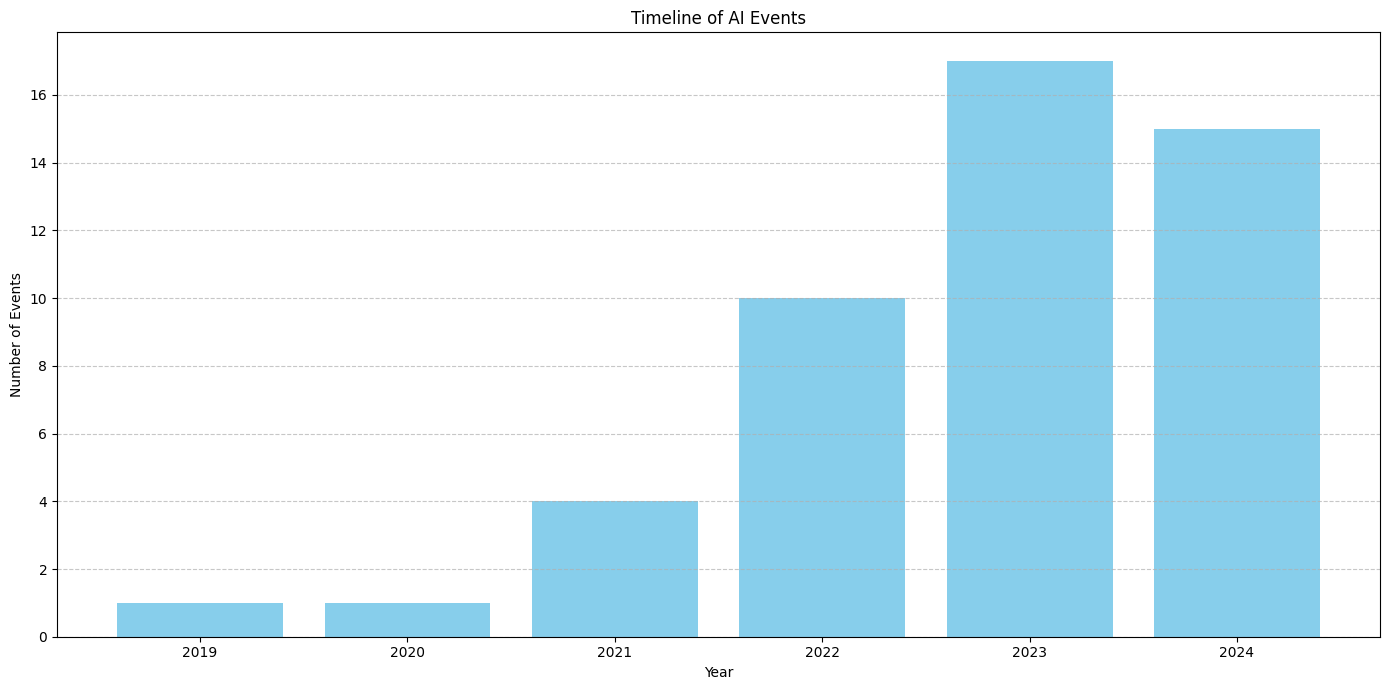

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Background Data/timeline_of_the_ai.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
ai_timeline_per_year = data.groupby('Year').size()

plt.figure(figsize=(14, 7))
plt.bar(ai_timeline_per_year.index, ai_timeline_per_year.values, color='skyblue')
plt.title('Timeline of AI Events')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Graph 2: Stock Price Trends

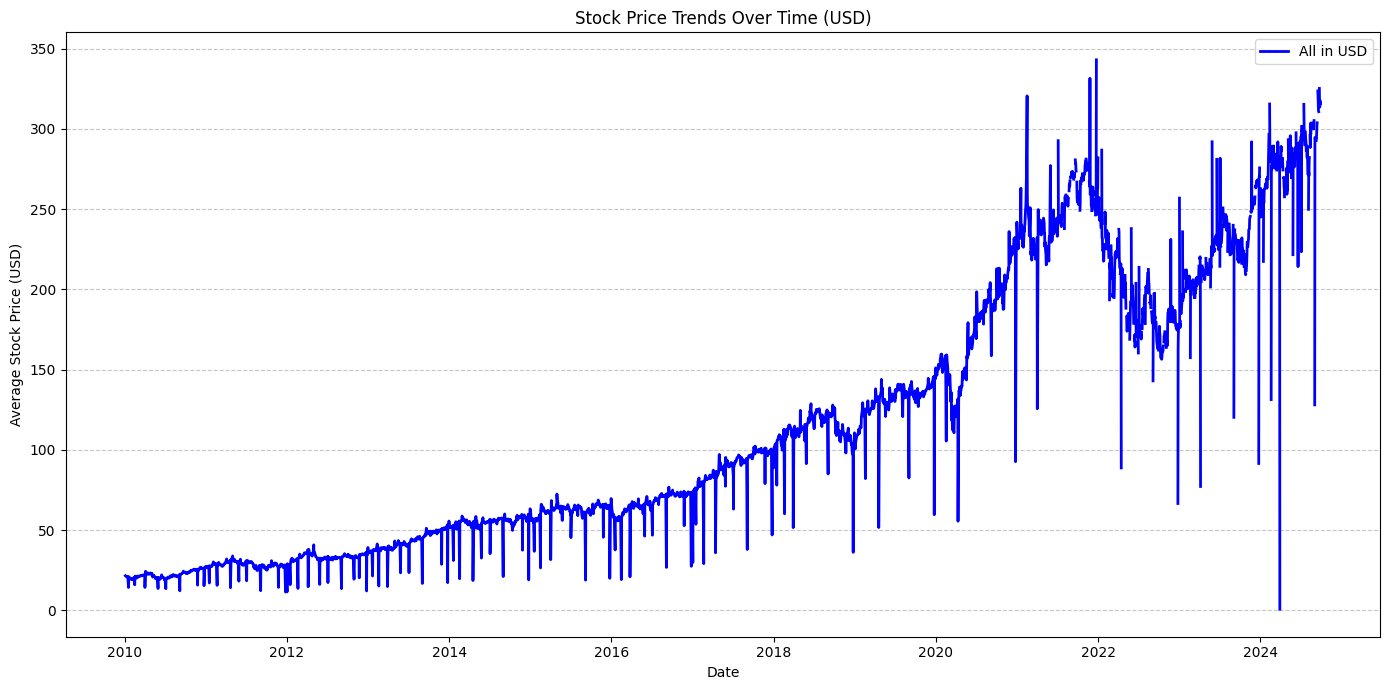

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data with all in USD
timeseries_data_usd = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_timeseries_usd_full.csv')
timeseries_data_usd['Date'] = pd.to_datetime(timeseries_data_usd['Date'])

# Calculate average prices over time
price_trends_usd = timeseries_data_usd.groupby('Date')['Adj Close USD'].mean()

# Plot trends
plt.figure(figsize=(14, 7))
plt.plot(price_trends_usd.index, price_trends_usd.values, color='blue', label='All in USD', linewidth=2)
plt.title('Stock Price Trends Over Time (USD)')
plt.xlabel('Date')
plt.ylabel('Average Stock Price (USD)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

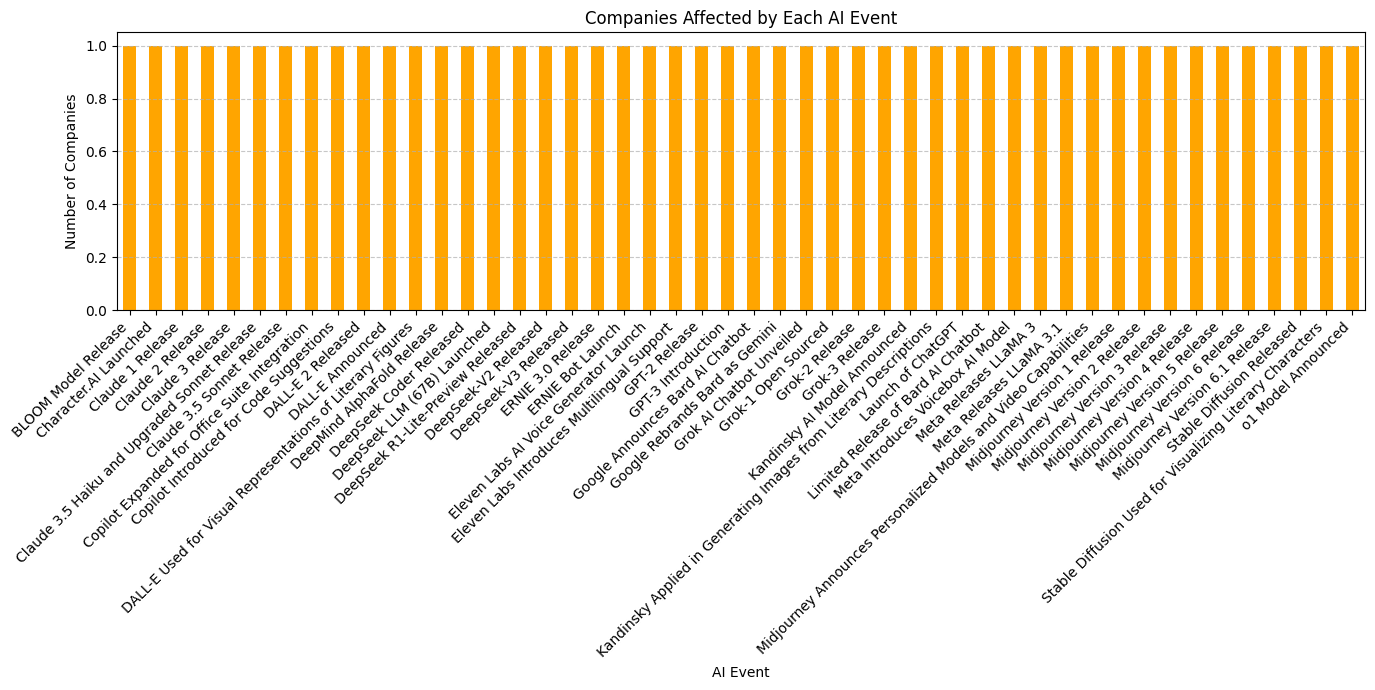

In [13]:
ai_event_counts = data.groupby('AI Event')['Company'].nunique()

plt.figure(figsize=(14, 7))
ai_event_counts.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Companies Affected by Each AI Event')
plt.xlabel('AI Event')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

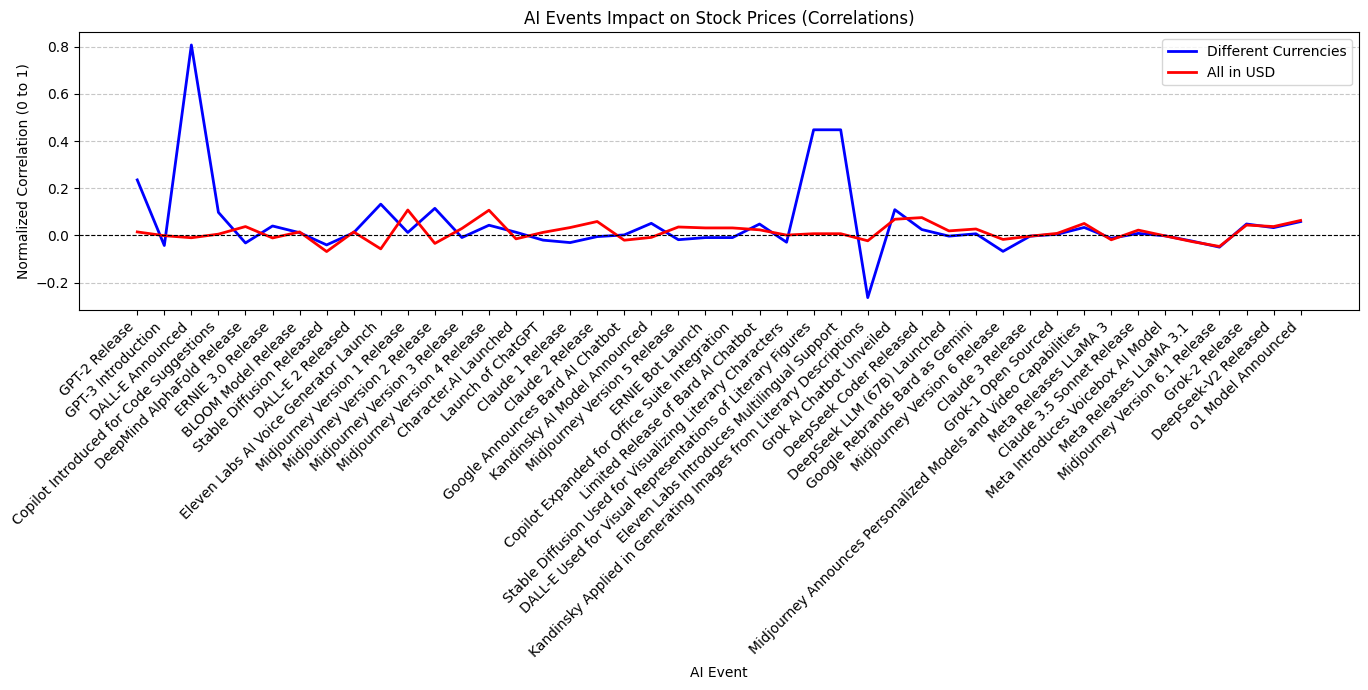

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data with different currencies
data_diff_currency = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_timeseries_different_currency.csv')
data_diff_currency['Date'] = pd.to_datetime(data_diff_currency['Date'])

# Load data with all in USD
data_usd = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_timeseries_usd_full.csv')
data_usd['Date'] = pd.to_datetime(data_usd['Date'])

# Load AI events
data_ai_events = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Background Data/timeline_of_the_ai.csv')
data_ai_events['Date'] = pd.to_datetime(data_ai_events['Date'])

# Calculate MWE window changes for different currency and all USD datasets
def calculate_mwe_changes(data, ai_events):
    mwe_results = []
    for _, event in ai_events.iterrows():
        event_date = event['Date']
        event_name = event['AI Event']

        # Filter data for MWE window
        pre_event_window = data[(data['Date'] >= event_date - pd.Timedelta(days=5)) & (data['Date'] < event_date)]
        post_event_window = data[(data['Date'] > event_date) & (data['Date'] <= event_date + pd.Timedelta(days=10))]

        if not pre_event_window.empty and not post_event_window.empty:
            pre_avg = pre_event_window['Adj Close'].mean()
            post_avg = post_event_window['Adj Close'].mean()
            change = ((post_avg - pre_avg) / pre_avg) * 100
            mwe_results.append({'AI Event': event_name, 'Change (%)': change})

    return pd.DataFrame(mwe_results)

# Calculate MWE changes for both datasets
mwe_diff_currency = calculate_mwe_changes(data_diff_currency, data_ai_events)
mwe_usd = calculate_mwe_changes(data_usd, data_ai_events)

# Merge MWE results for comparison
mwe_comparison = mwe_diff_currency.merge(mwe_usd, on='AI Event', suffixes=('_DiffCurrency', '_USD'))

# Plot correlations between AI events and stock prices
plt.figure(figsize=(14, 7))
plt.plot(mwe_comparison['AI Event'], mwe_comparison['Change (%)_DiffCurrency'] / 100, label='Different Currencies', color='blue', linewidth=2)
plt.plot(mwe_comparison['AI Event'], mwe_comparison['Change (%)_USD'] / 100, label='All in USD', color='red', linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('AI Events Impact on Stock Prices (Correlations)')
plt.xlabel('AI Event')
plt.ylabel('Normalized Correlation (0 to 1)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Creating the MWE table

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data with different currencies
data_diff_currency = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_timeseries_different_currency.csv')
data_diff_currency['Date'] = pd.to_datetime(data_diff_currency['Date'])

# Load AI events
data_ai_events = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Background Data/timeline_of_the_ai.csv')
data_ai_events['Date'] = pd.to_datetime(data_ai_events['Date'])

# Function to calculate MWE values for AI events
def calculate_mwe_table(data, ai_events):
    mwe_table = []
    for _, event in ai_events.iterrows():
        event_date = event['Date']
        event_name = event['AI Event']

        # Pre-event window
        pre_event_window = data[(data['Date'] >= event_date - pd.Timedelta(days=5)) & (data['Date'] < event_date)]
        pre_avg = pre_event_window['Adj Close'].mean() if not pre_event_window.empty else np.nan

        # Event-day window
        event_day = data[data['Date'] == event_date]
        event_avg = event_day['Adj Close'].mean() if not event_day.empty else np.nan

        # Post-event window
        post_event_window = data[(data['Date'] > event_date) & (data['Date'] <= event_date + pd.Timedelta(days=10))]
        post_avg = post_event_window['Adj Close'].mean() if not post_event_window.empty else np.nan

        mwe_table.append({
            'AI Event': event_name,
            'Pre-Event Avg': pre_avg,
            'Event-Day Avg': event_avg,
            'Post-Event Avg': post_avg
        })

    return pd.DataFrame(mwe_table)

# Calculate MWE table for different currencies
data_usd = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_timeseries_usd_full.csv')
data_usd['Date'] = pd.to_datetime(data_usd['Date'])
mwe_table = calculate_mwe_table(data_usd, data_ai_events)

# Display and save MWE table
print(mwe_table)
mwe_table.to_csv('mwe_table_for_ai_events.csv', index=False)
print("MWE table has been saved as 'mwe_table_for_ai_events.csv'.")


                                             AI Event  Pre-Event Avg  \
0                                       GPT-2 Release     121.106543   
1                                  GPT-3 Introduction     169.361974   
2                                    DALL-E Announced     234.316330   
3             Copilot Introduced for Code Suggestions     242.028337   
4                          DeepMind AlphaFold Release     242.132788   
5                                   ERNIE 3.0 Release     260.421163   
6                                 BLOOM Model Release     175.820263   
7                           Stable Diffusion Released     201.683421   
8                                   DALL-E 2 Released     175.820263   
9               Eleven Labs AI Voice Generator Launch     242.818100   
10                       Midjourney Version 1 Release     198.460288   
11                       Midjourney Version 2 Release     213.607834   
12                       Midjourney Version 3 Release     185.93

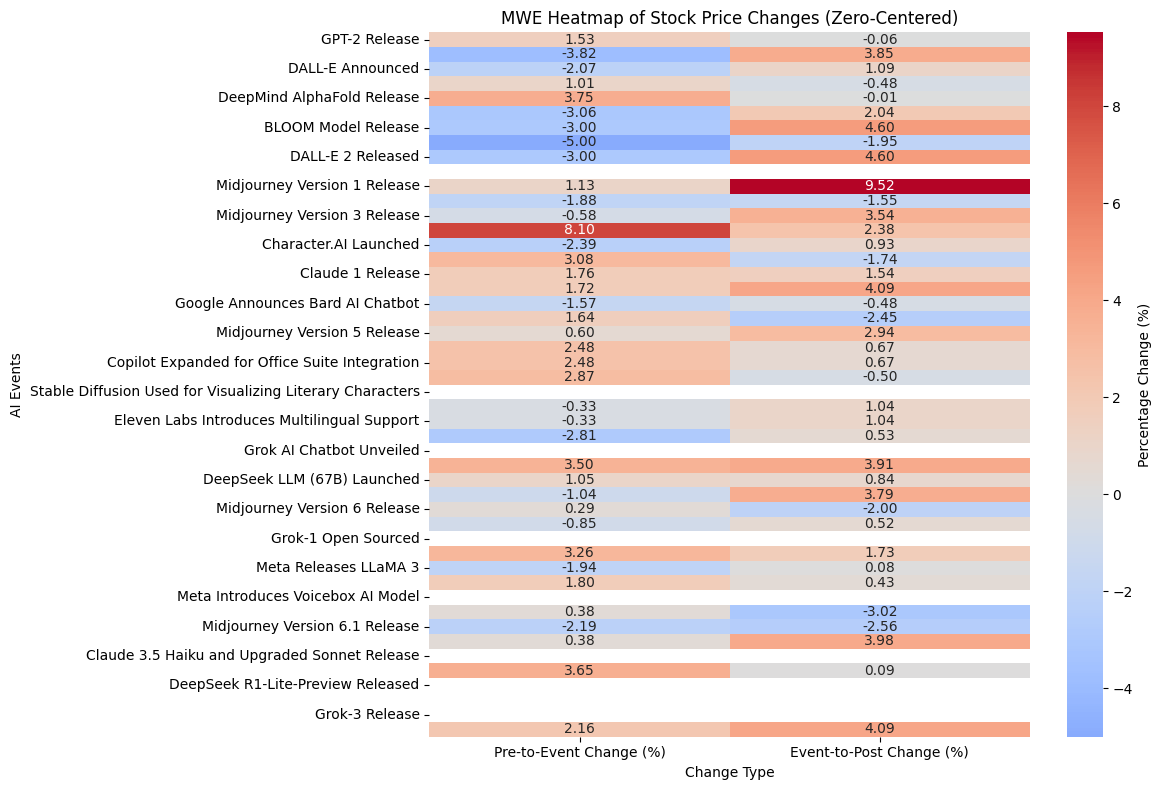

                                             AI Event  Pre-Event Avg  \
0                                       GPT-2 Release     121.106543   
1                                  GPT-3 Introduction     169.361974   
2                                    DALL-E Announced     234.316330   
3             Copilot Introduced for Code Suggestions     242.028337   
4                          DeepMind AlphaFold Release     242.132788   
5                                   ERNIE 3.0 Release     260.421163   
6                                 BLOOM Model Release     175.820263   
7                           Stable Diffusion Released     201.683421   
8                                   DALL-E 2 Released     175.820263   
9               Eleven Labs AI Voice Generator Launch     242.818100   
10                       Midjourney Version 1 Release     198.460288   
11                       Midjourney Version 2 Release     213.607834   
12                       Midjourney Version 3 Release     185.93

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load MWE table from the specified file
mwe_table = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/mwe_table_for_ai_events.csv')

# Calculate percentage changes for heatmap
mwe_table['Pre-to-Event Change (%)'] = ((mwe_table['Event-Day Avg'] - mwe_table['Pre-Event Avg']) / mwe_table['Pre-Event Avg']) * 100
mwe_table['Event-to-Post Change (%)'] = ((mwe_table['Post-Event Avg'] - mwe_table['Event-Day Avg']) / mwe_table['Event-Day Avg']) * 100

# Reshape the data for heatmap
heatmap_data = mwe_table.set_index('AI Event')[['Pre-to-Event Change (%)', 'Event-to-Post Change (%)']]

# Plot heatmap with zero-centered color scale
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", center=0, cbar_kws={'label': 'Percentage Change (%)'})
plt.title('MWE Heatmap of Stock Price Changes (Zero-Centered)')
plt.ylabel('AI Events')
plt.xlabel('Change Type')
plt.tight_layout()
plt.show()

# Display and save MWE table
print(mwe_table)
mwe_table.to_csv('mwe_table_for_ai_events_processed.csv', index=False)
print("Processed MWE table has been saved as 'mwe_table_for_ai_events_processed.csv'.")


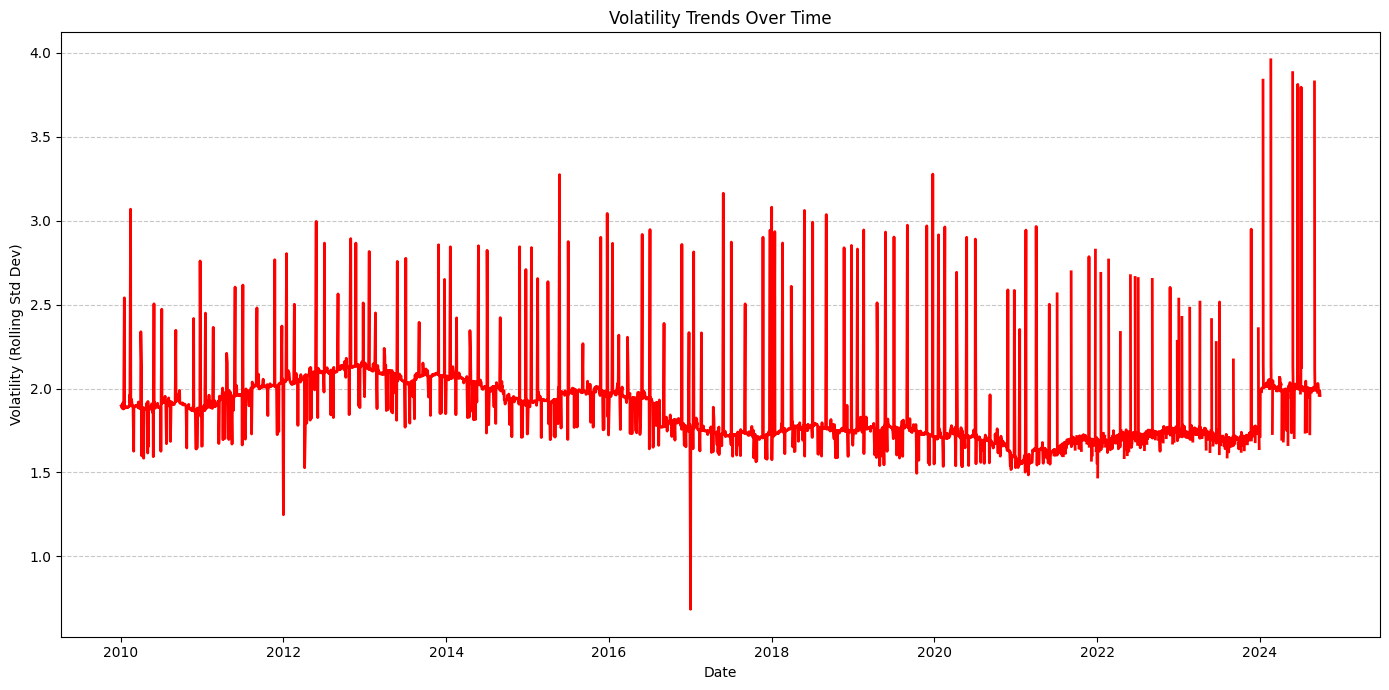

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data for volatility trends
timeseries_data = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_timeseries_usd_full.csv')
timeseries_data['Date'] = pd.to_datetime(timeseries_data['Date'])

# Calculate log returns for volatility
log_returns = np.log(timeseries_data['Adj Close'] / timeseries_data['Adj Close'].shift(1))
timeseries_data['Log Returns'] = log_returns

# Calculate rolling standard deviation (volatility)
volatility = timeseries_data.groupby('Date')['Log Returns'].std()

# Plot volatility trends
plt.figure(figsize=(14, 7))
plt.plot(volatility.index, volatility.values, color='red', linewidth=2)
plt.title('Volatility Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (Rolling Std Dev)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Stock Prices All Companies Over Time (USD)

/var/folders/g1/lmg3w4rs5t7f4c_vswsjfrz80000gn/T/ipykernel_19829/66131916.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


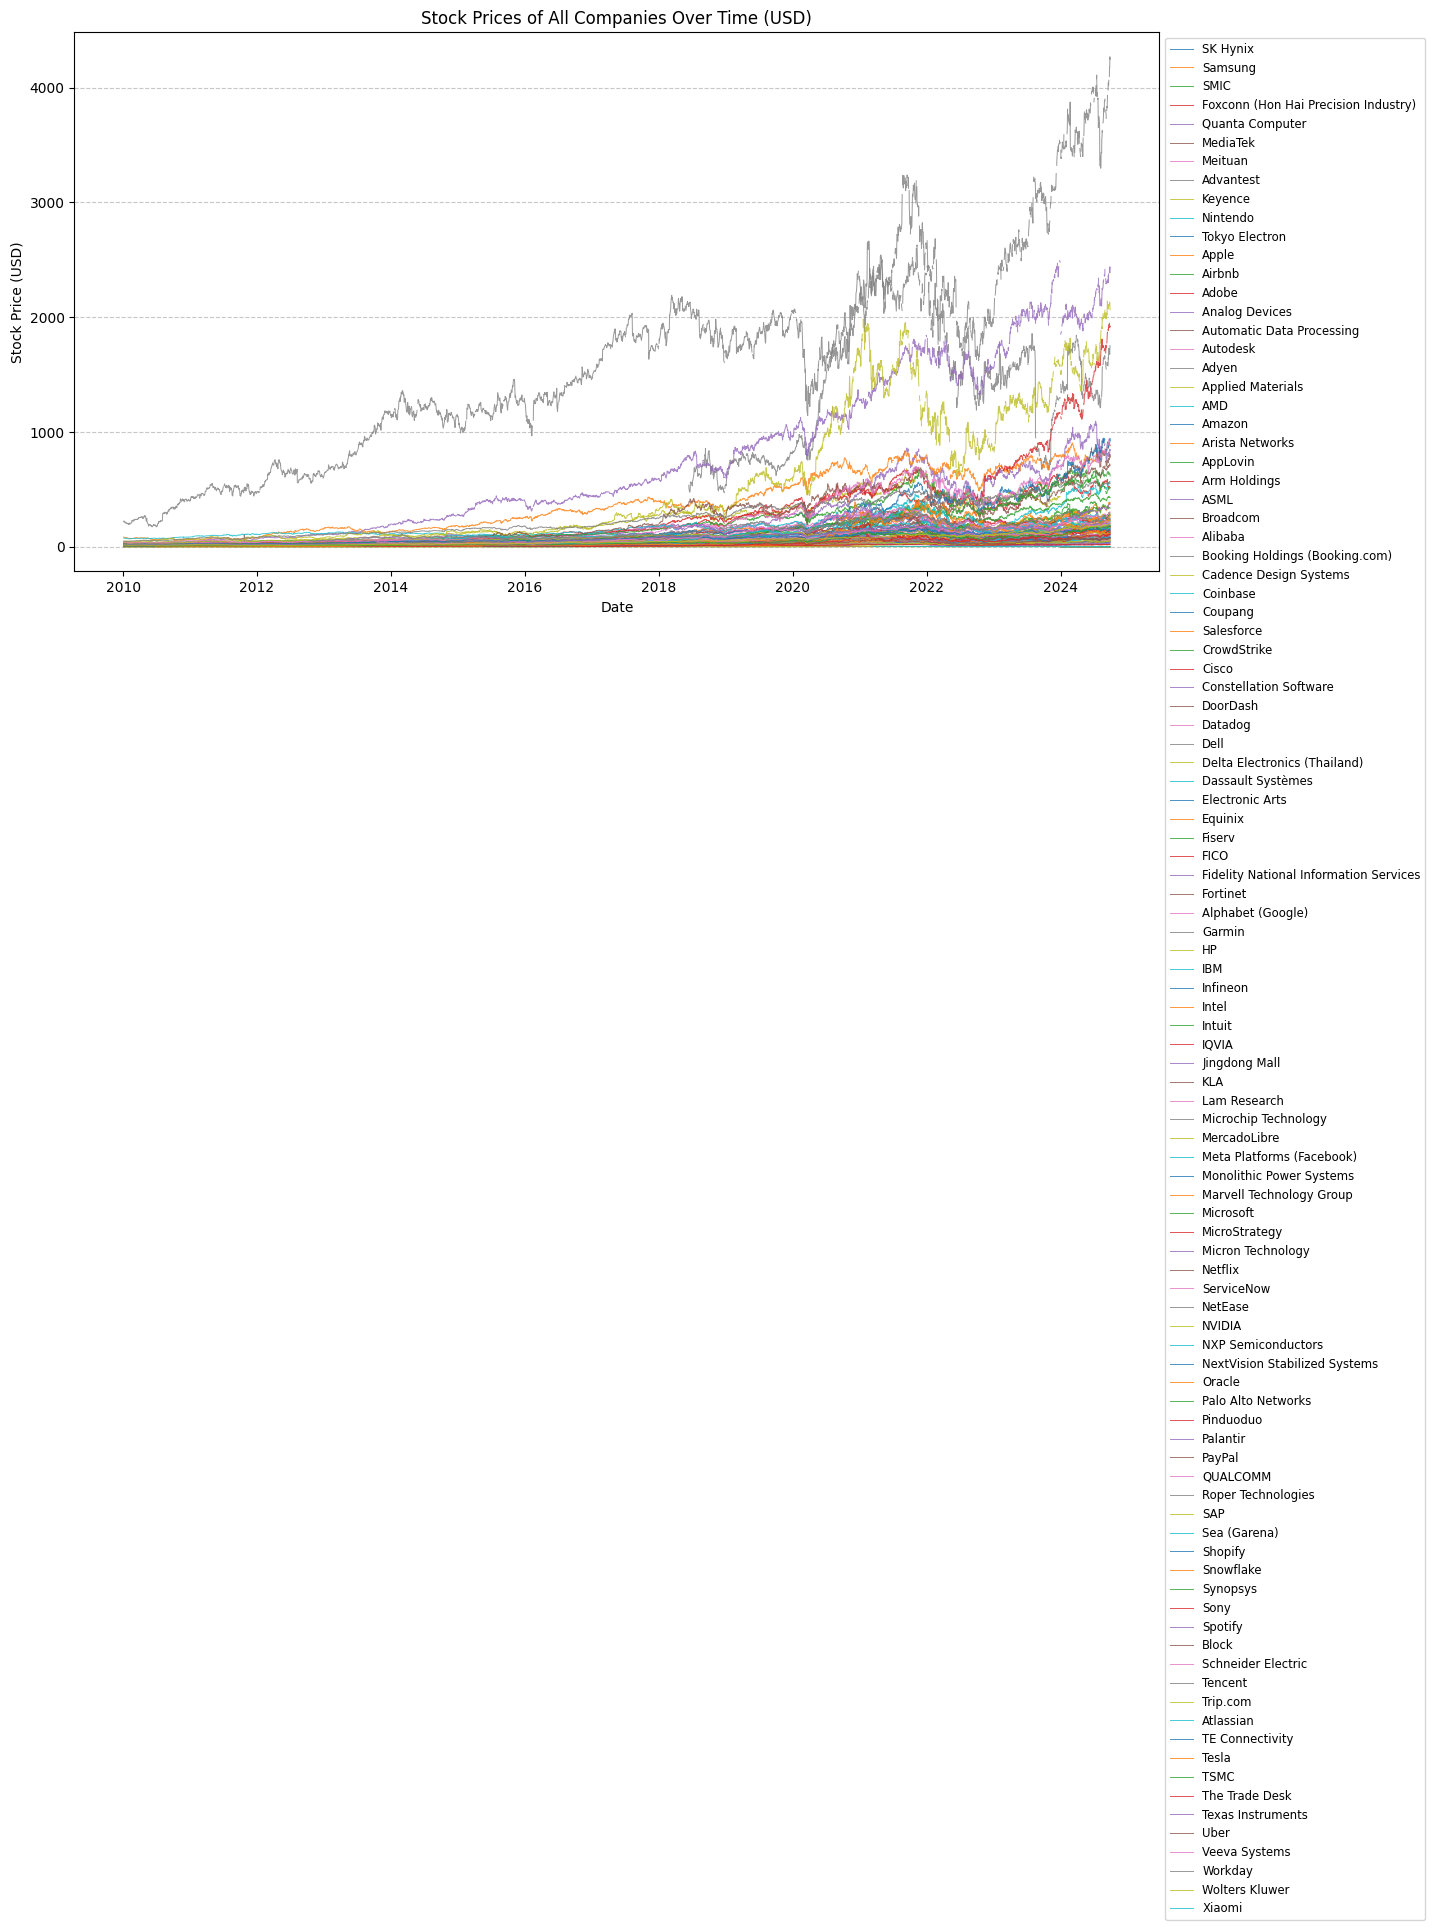

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data for all companies in USD
timeseries_data = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_timeseries_usd_full.csv')
metadata = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_metadata_top100.csv')
metadata = metadata.set_index('Symbol')['Name']

timeseries_data['Date'] = pd.to_datetime(timeseries_data['Date'])

# Pivot data to have companies as columns and dates as rows
price_data = timeseries_data.pivot(index='Date', columns='Symbol', values='Adj Close')

# Sort columns by the latest stock price
descending_symbols = price_data.iloc[-1].sort_values(ascending=False).index
price_data = price_data[descending_symbols]

# Map symbols to company names for the legend
legend_labels = [metadata.get(symbol, symbol) for symbol in price_data.columns]

# Plot all companies' prices over time
plt.figure(figsize=(14, 7))
plt.plot(price_data, linewidth=0.7, alpha=0.8)
plt.title('Stock Prices of All Companies Over Time (USD)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.tight_layout()
plt.show()


## Stock Prices All Companies Over Time (USD) with AI Events

/var/folders/g1/lmg3w4rs5t7f4c_vswsjfrz80000gn/T/ipykernel_19829/4030456038.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


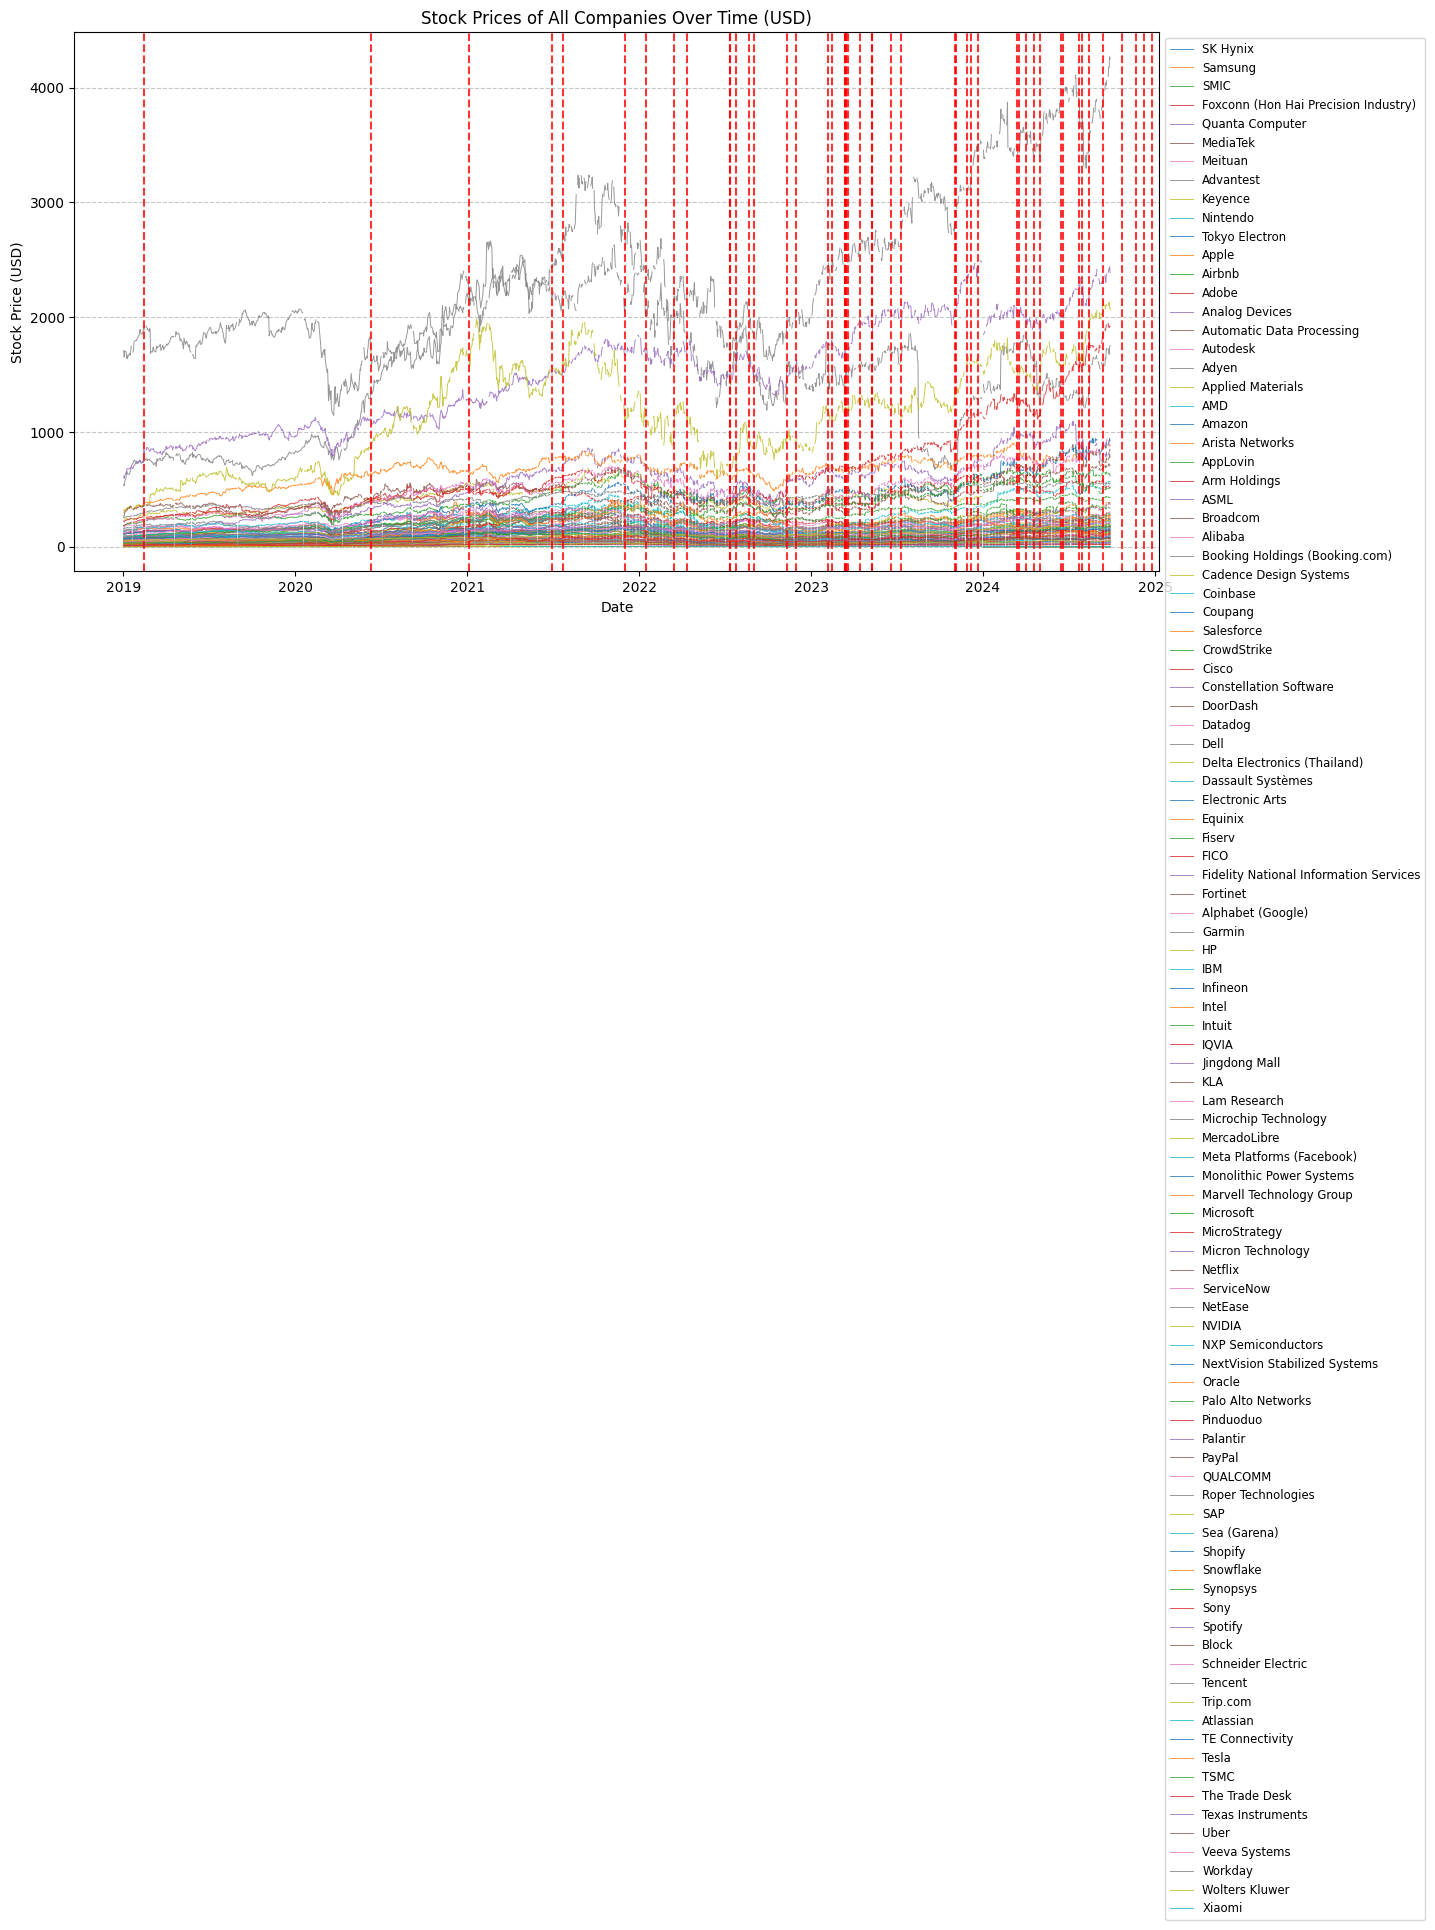

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data for all companies in USD
timeseries_data = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_timeseries_usd_full.csv')
metadata = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_metadata_top100.csv')
metadata = metadata.set_index('Symbol')['Name']
ai_events = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Background Data/timeline_of_the_ai.csv')
ai_events['Date'] = pd.to_datetime(ai_events['Date'])

# Convert event dates to a list
ai_event_dates = ai_events['Date'].tolist()

# Process timeseries data
timeseries_data['Date'] = pd.to_datetime(timeseries_data['Date'])
timeseries_data = timeseries_data[timeseries_data['Date'] >= '2019-01-01']

# Pivot data to have companies as columns and dates as rows
price_data = timeseries_data.pivot(index='Date', columns='Symbol', values='Adj Close')

# Sort columns by the latest stock price
descending_symbols = price_data.iloc[-1].sort_values(ascending=False).index
price_data = price_data[descending_symbols]

# Map symbols to company names for the legend
legend_labels = [metadata.get(symbol, symbol) for symbol in price_data.columns]

# Plot all companies' prices over time
plt.figure(figsize=(14, 7))
plt.plot(price_data, linewidth=0.7, alpha=0.8)
for event_date in ai_event_dates:
    plt.axvline(event_date, color='red', linestyle='--', alpha=0.8, label='AI Event' if event_date == ai_event_dates[0] else "")
plt.title('Stock Prices of All Companies Over Time (USD)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.tight_layout()
plt.show()


## Stock Prices Top and Bottom Companies Over Time (USD)

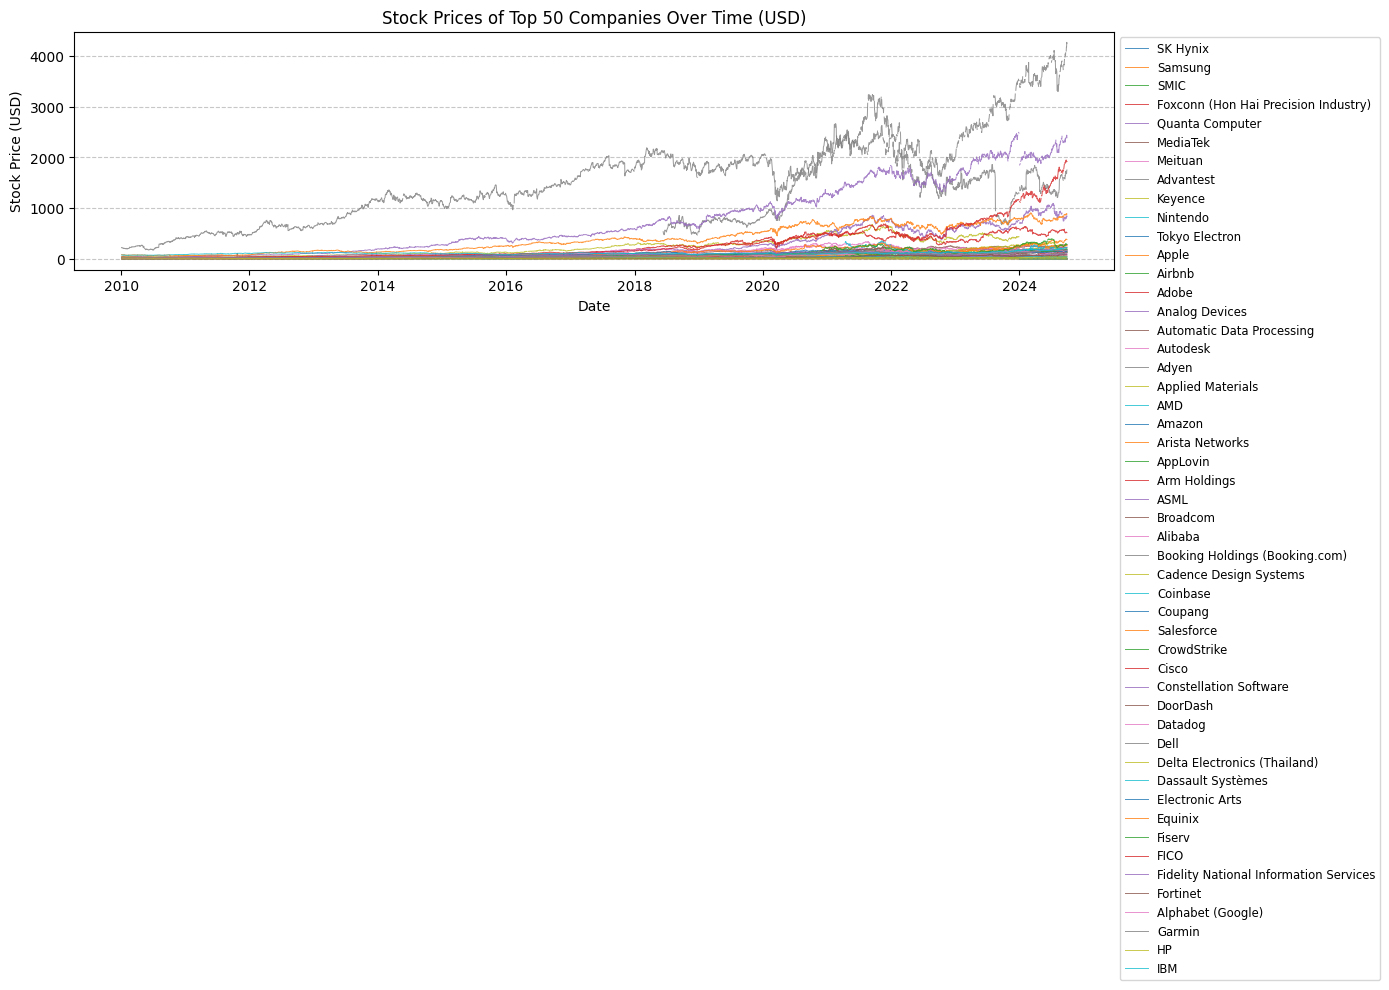

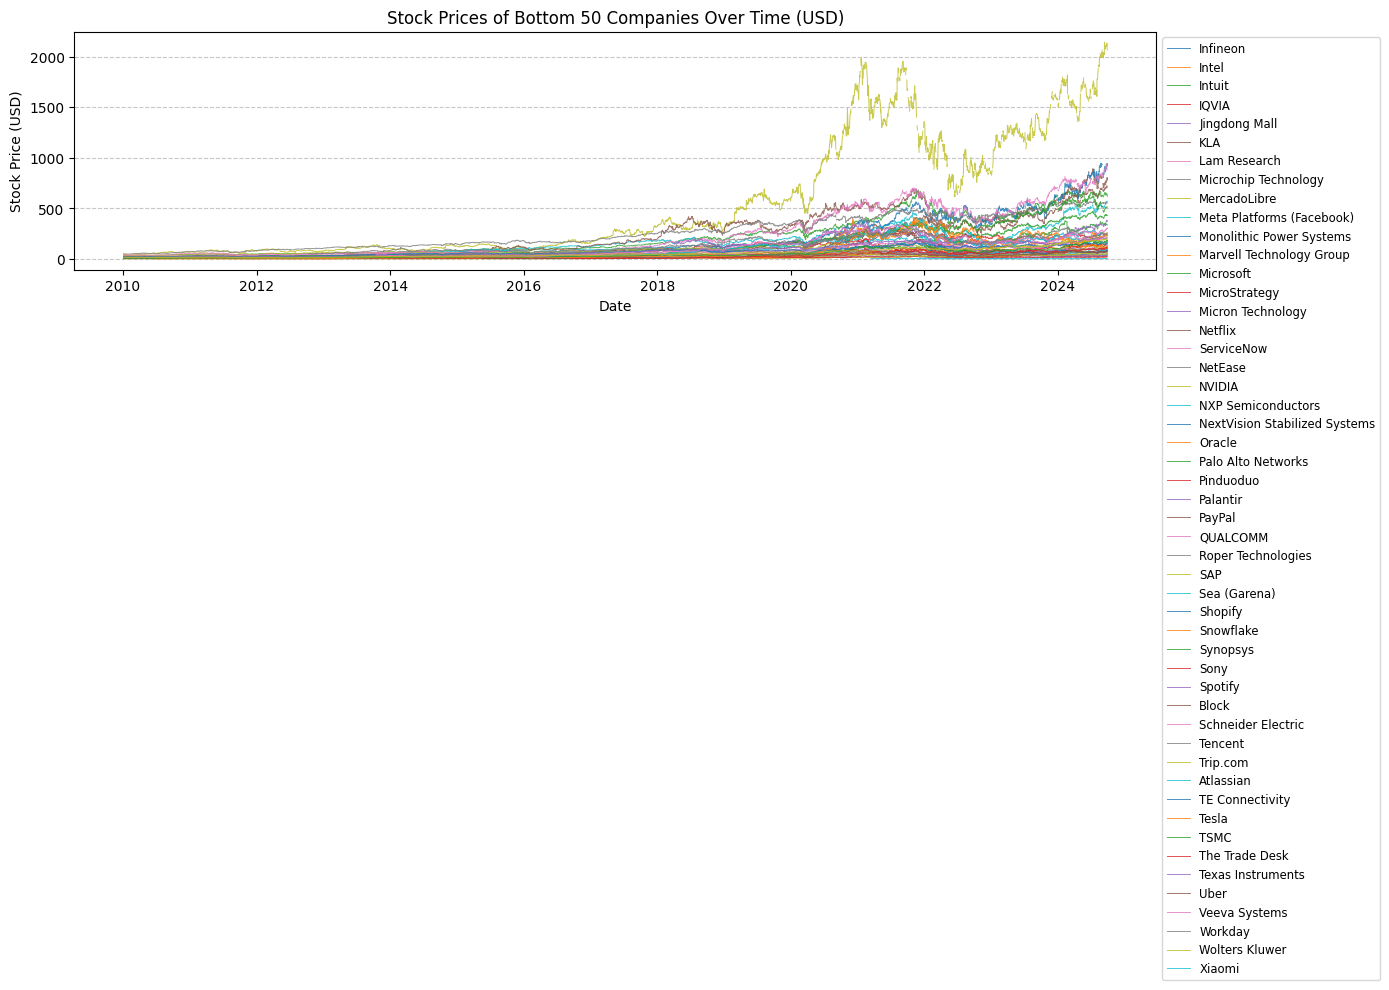

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data for all companies in USD
timeseries_data = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_timeseries_usd_full.csv')
metadata = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_metadata_top100.csv')
metadata = metadata.set_index('Symbol')['Name']

timeseries_data['Date'] = pd.to_datetime(timeseries_data['Date'])

# Pivot data to have companies as columns and dates as rows
price_data = timeseries_data.pivot(index='Date', columns='Symbol', values='Adj Close')

# Sort columns by the latest stock price
descending_symbols = price_data.iloc[-1].sort_values(ascending=False).index
price_data = price_data[descending_symbols]

# Map symbols to company names for the legend
legend_labels = [metadata.get(symbol, symbol) for symbol in price_data.columns]

# Split into top 50 and bottom 50
top_50 = price_data.iloc[:, :50]
bottom_50 = price_data.iloc[:, 50:]

# Plot top 50 companies' prices over time
plt.figure(figsize=(14, 7))
plt.plot(top_50, linewidth=0.7, alpha=0.8)
plt.title('Stock Prices of Top 50 Companies Over Time (USD)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([metadata.get(symbol, symbol) for symbol in top_50.columns], loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.tight_layout()
plt.show()

# Plot bottom 50 companies' prices over time
plt.figure(figsize=(14, 7))
plt.plot(bottom_50, linewidth=0.7, alpha=0.8)
plt.title('Stock Prices of Bottom 50 Companies Over Time (USD)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([metadata.get(symbol, symbol) for symbol in bottom_50.columns], loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.tight_layout()
plt.show()


## Stock Prices Top and Bottom Companies Over Time (USD)

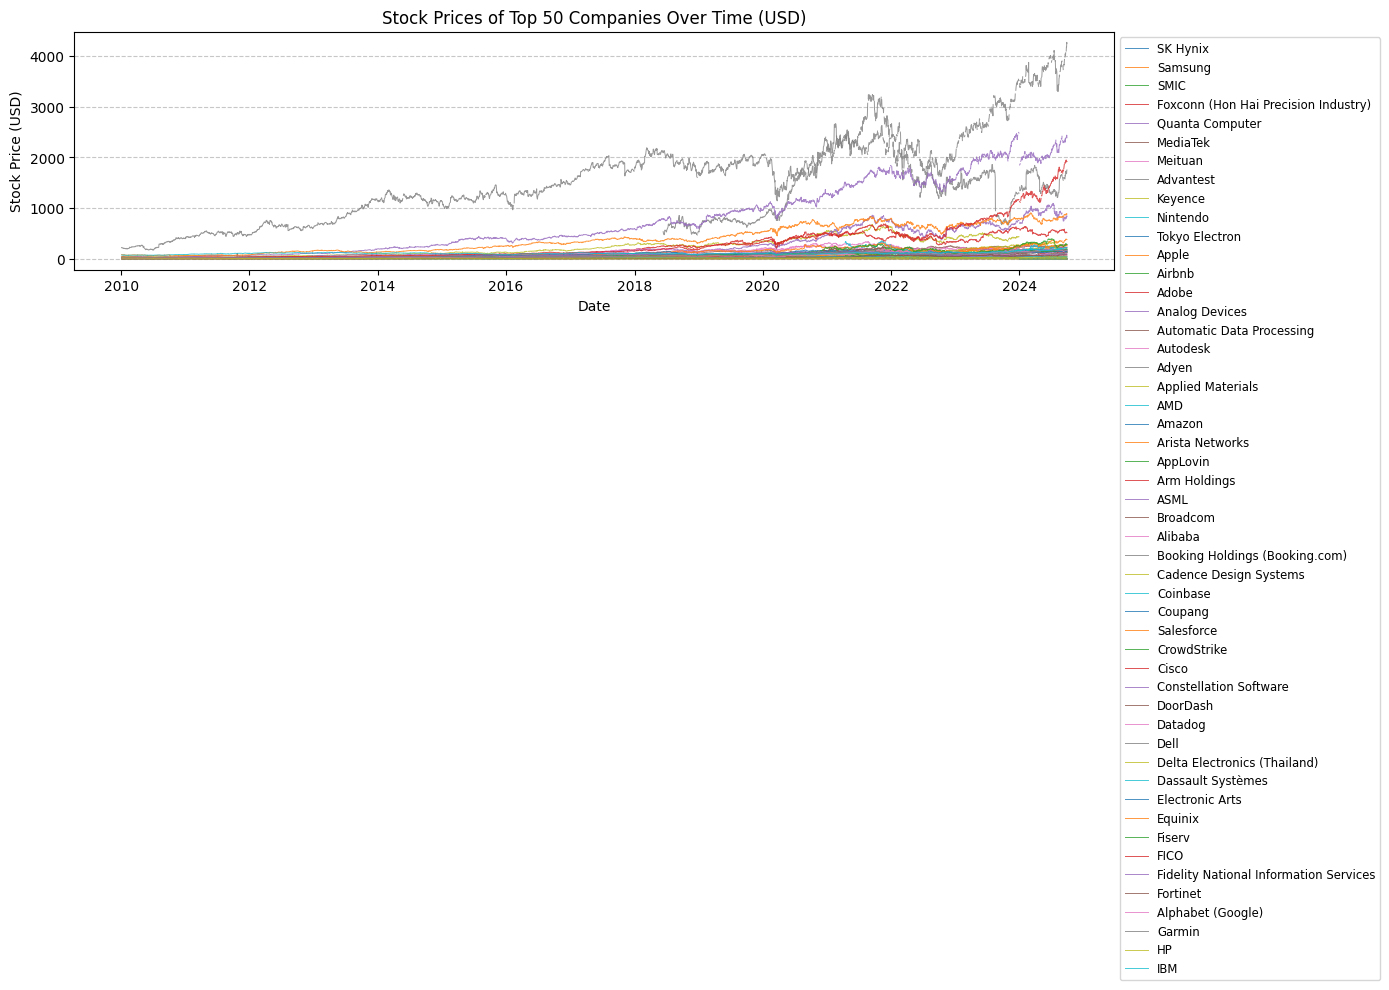

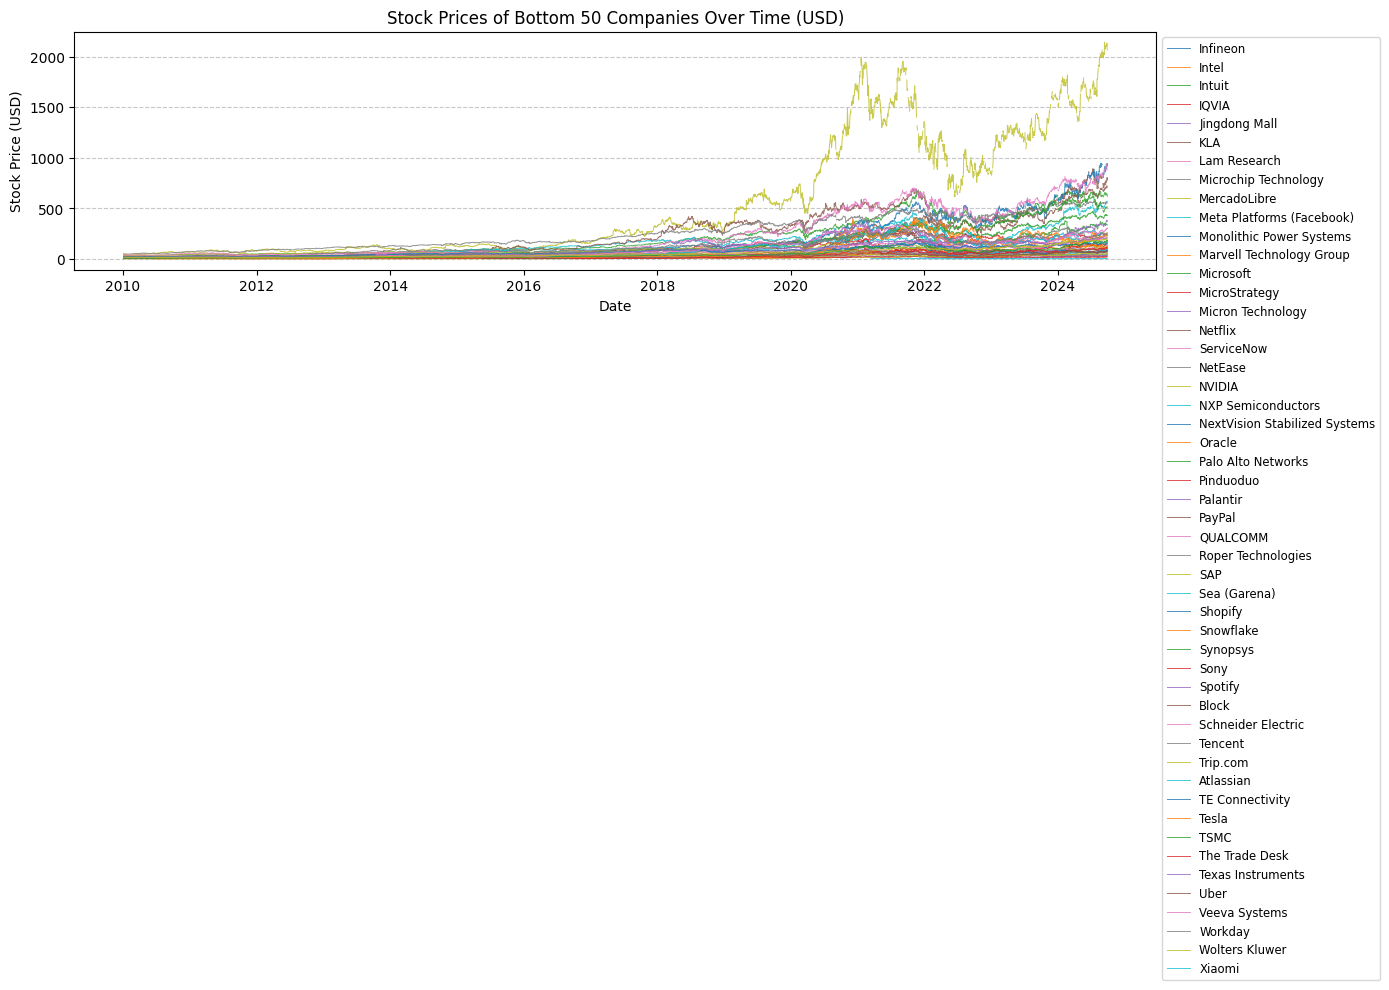

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data for all companies in USD
timeseries_data = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_timeseries_usd_full.csv')
metadata = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_metadata_top100.csv')
metadata = metadata.set_index('Symbol')['Name']

timeseries_data['Date'] = pd.to_datetime(timeseries_data['Date'])

# Pivot data to have companies as columns and dates as rows
price_data = timeseries_data.pivot(index='Date', columns='Symbol', values='Adj Close')

# Sort columns by the latest stock price
descending_symbols = price_data.iloc[-1].sort_values(ascending=False).index
price_data = price_data[descending_symbols]

# Map symbols to company names for the legend
legend_labels = [metadata.get(symbol, symbol) for symbol in price_data.columns]

# Split into top 50 and bottom 50
top_50 = price_data.iloc[:, :50]
bottom_50 = price_data.iloc[:, 50:]

# Plot top 50 companies' prices over time
plt.figure(figsize=(14, 7))
plt.plot(top_50, linewidth=0.7, alpha=0.8)
plt.title('Stock Prices of Top 50 Companies Over Time (USD)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([metadata.get(symbol, symbol) for symbol in top_50.columns], loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.tight_layout()
plt.show()

# Plot bottom 50 companies' prices over time
plt.figure(figsize=(14, 7))
plt.plot(bottom_50, linewidth=0.7, alpha=0.8)
plt.title('Stock Prices of Bottom 50 Companies Over Time (USD)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([metadata.get(symbol, symbol) for symbol in bottom_50.columns], loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.tight_layout()
plt.show()


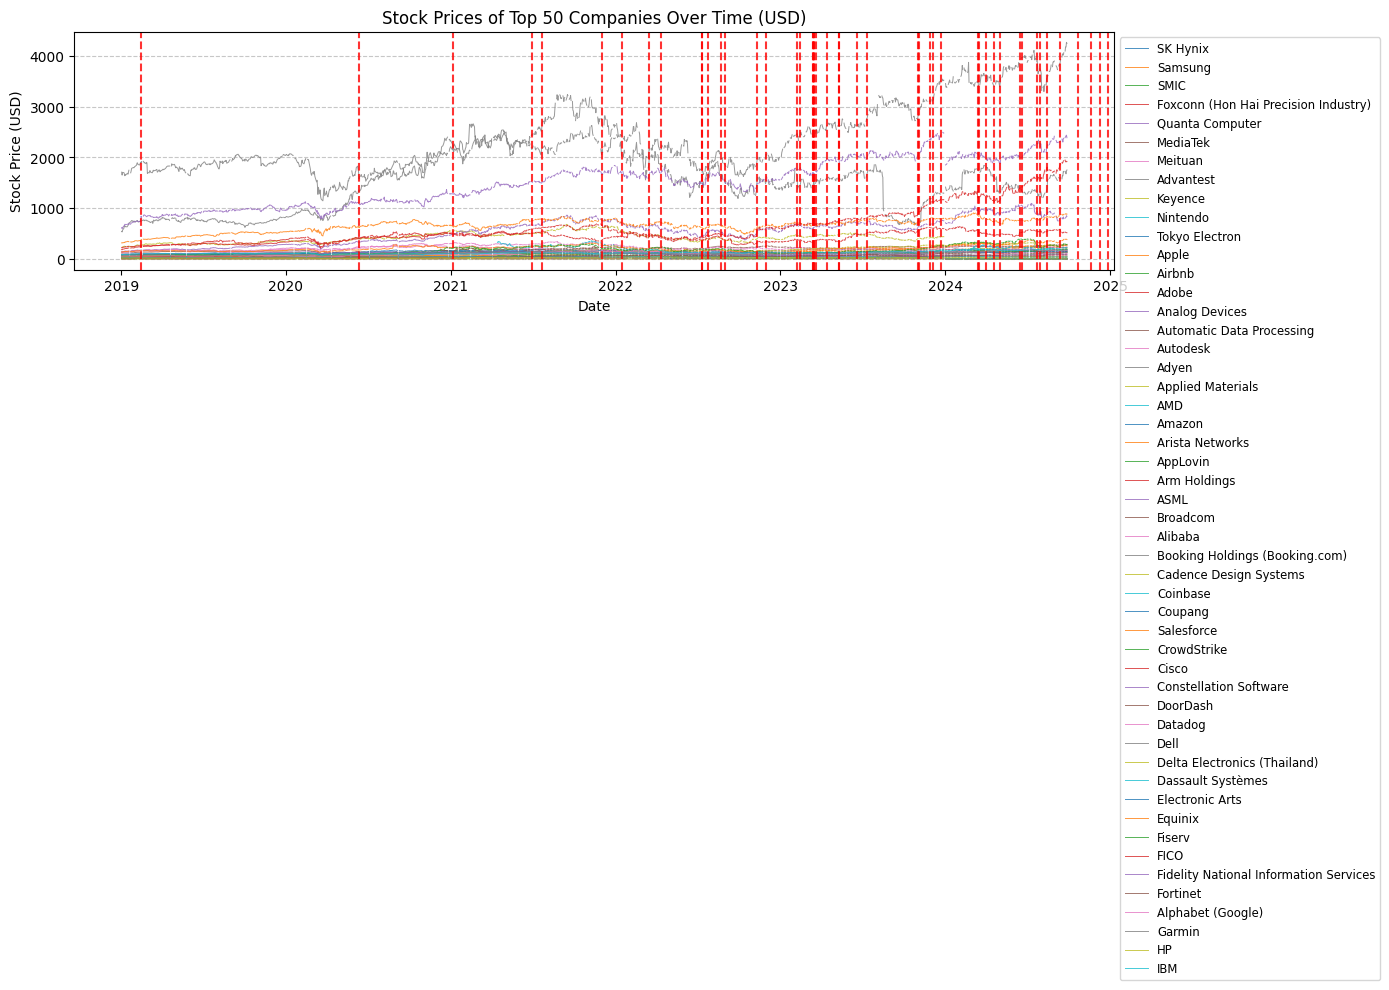

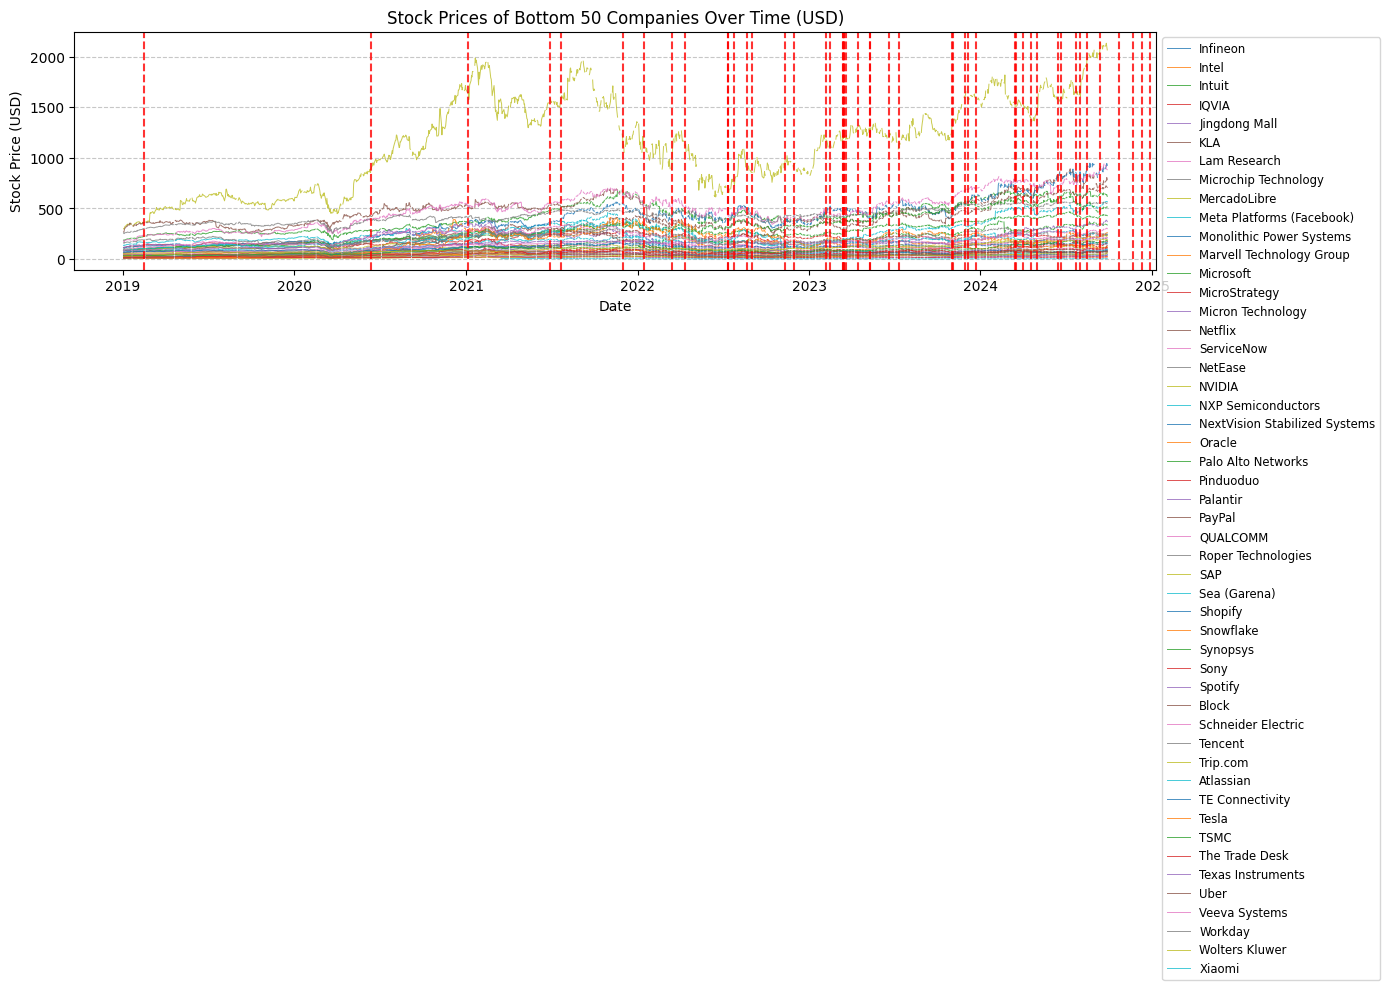

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data for all companies in USD
timeseries_data = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_timeseries_usd_full.csv')
metadata = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_metadata_top100.csv')
metadata = metadata.set_index('Symbol')['Name']
ai_events = pd.read_csv('/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Background Data/timeline_of_the_ai.csv')
ai_events['Date'] = pd.to_datetime(ai_events['Date'])

# Convert event dates to a list
ai_event_dates = ai_events['Date'].tolist()

# Process timeseries data
timeseries_data['Date'] = pd.to_datetime(timeseries_data['Date'])
timeseries_data = timeseries_data[timeseries_data['Date'] >= '2019-01-01']

# Pivot data to have companies as columns and dates as rows
price_data = timeseries_data.pivot(index='Date', columns='Symbol', values='Adj Close')

# Sort columns by the latest stock price
descending_symbols = price_data.iloc[-1].sort_values(ascending=False).index
price_data = price_data[descending_symbols]

# Map symbols to company names for the legend
legend_labels = [metadata.get(symbol, symbol) for symbol in price_data.columns]

# Split into top 50 and bottom 50
top_50 = price_data.iloc[:, :50]
bottom_50 = price_data.iloc[:, 50:]

# Plot top 50 companies' prices over time
plt.figure(figsize=(14, 7))
plt.plot(top_50, linewidth=0.7, alpha=0.8)
for event_date in ai_event_dates:
    plt.axvline(event_date, color='red', linestyle='--', alpha=0.8, label='AI Event' if event_date == ai_event_dates[0] else "")
plt.title('Stock Prices of Top 50 Companies Over Time (USD)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([metadata.get(symbol, symbol) for symbol in top_50.columns], loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.tight_layout()
plt.show()

# Plot bottom 50 companies' prices over time
plt.figure(figsize=(14, 7))
plt.plot(bottom_50, linewidth=0.7, alpha=0.8)
for event_date in ai_event_dates:
    plt.axvline(event_date, color='red', linestyle='--', alpha=0.8, label='AI Event' if event_date == ai_event_dates[0] else "")
plt.title('Stock Prices of Bottom 50 Companies Over Time (USD)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([metadata.get(symbol, symbol) for symbol in bottom_50.columns], loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.tight_layout()
plt.show()
